# Least Square Fit - Linear Model


## Authors
Damien Ségransan

## Learning Goals
1. Derive, analytically, for a straight line model an estimate of the line parameters
2. Estimate the impact of noise on the estimation of the model parameters.
3. Estimate the impact of outliers (TBD)


## Keywords
$\chi^2$, Least Square Fit, Linear Model


## Introduction


$$\chi^2(\boldsymbol a) = \sum_{i=0}^{N-1}  \left[\frac{y_i - f(x_{i} \, |\, \boldsymbol a) }{\sigma_i} \right]^2$$

$ f(x_{i} \, |\, \boldsymbol a) = a_0 + a_1\, x_i$ and $\boldsymbol a = (a_0, a_1)$
$$\chi^2(a_0, a_1) = \sum_{i=0}^{N-1}  \left[\frac{y_i - a_0 - a_1\, x_i }{\sigma_i} \right]^2$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import corner
#pathFigures='/Users/Damien/Desktop/Master-AstrophysicsAndDataScience-2020-21/Class-2/'

### Let's simulate a set of observations using a straight line as a linear model

In [2]:
# Nos. of data points
N = 12

# x-values
tObs_d = np.sort(np.random.uniform(0, 13, size=N))
tPlot_d = np.linspace(-1, 14, num=50)

# Set the "true" parameters
aTrue, bTrue = np.sqrt(2),4

#draw error bars using a uniform distribution to "simulate" measurements of different quality.
#In observational astronomy it could correspond to different exposure time, different weather conditions.
yErrObs = np.random.uniform(1., 1.5, size=N)

#create synthetic model
yTrueObs = bTrue*tObs_d + aTrue # Points
yTruePlot = bTrue*tPlot_d+aTrue  # Line created using true values

#Generate the observational dataset drawn according to a normal distribution (Gaussian noise)
yObs = np.random.normal(yTrueObs,yErrObs,size=N)

### Plot the simulated observations

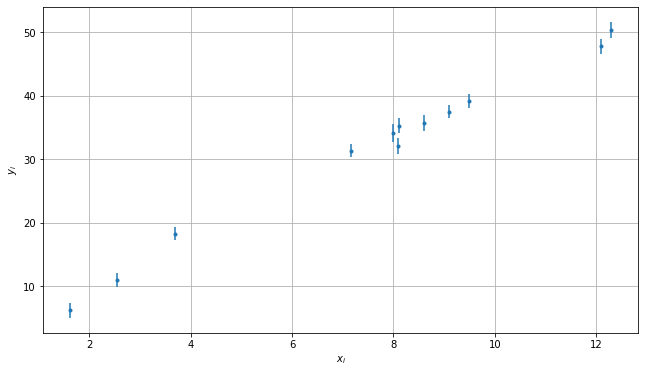

In [3]:
plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(tObs_d, yObs, yerr=yErrObs, fmt='.')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$')
plt.grid()

### Display True model

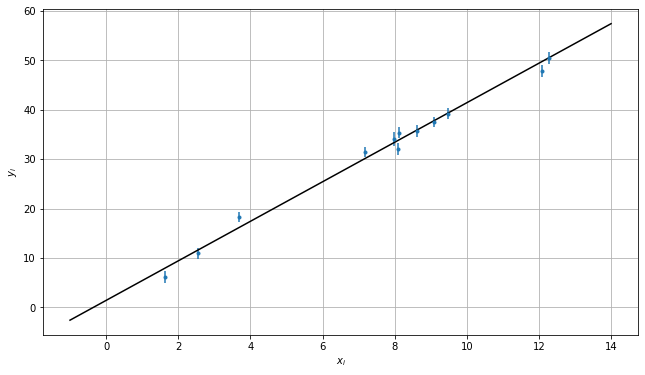

In [4]:
plt.figure(figsize=(16/1.5, 9/1.5))

# Points
plt.errorbar(tObs_d, yObs, yerr=yErrObs,fmt='.')

# True Model
plt.plot(tPlot_d,yTruePlot,color='black')

plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$')

plt.grid()

### Display residuals

(-3.32978648889727, 3.32978648889727)

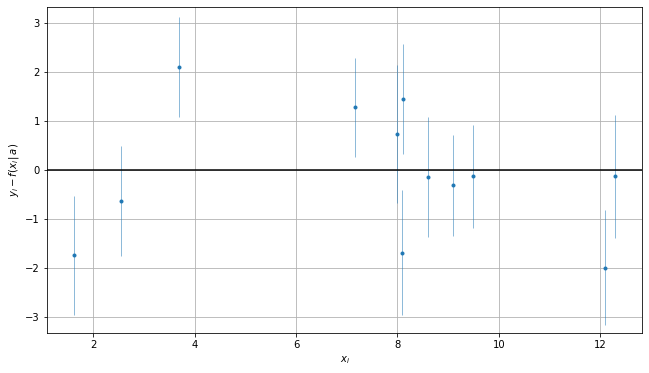

In [5]:
plt.figure(figsize=(16/1.5, 9/1.5))

# Residuals
plt.errorbar(tObs_d,yObs-yTrueObs, yerr=yErrObs,fmt='.',elinewidth=0.5)

# Show the major grid lines with dark grey lines
plt.grid()
plt.axhline(0,color='black',lw=1.5)

plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i - f(x_{i} \, |\, a) $')

limSup=yObs-yTrueObs+yErrObs
limInf=yObs-yTrueObs-yErrObs
plt.ylim(-1.05*np.max(np.abs([limInf,limSup])),1.05*np.max(np.abs([limInf,limSup])))

### Compute the $\chi^2$ for the true parameters $(a_t,b_t)$, ie.  $\chi^2(a_t,b_t)$

In [6]:
chi2True=np.sum(((yObs-yTrueObs)/yErrObs)**2)
print('True value of ' + r'$\chi^2$' + ' is ' + str(chi2True))

True value of $\chi^2$ is 15.0065259662893


### Compute the Covariance Matrix and print its values

In [7]:
#X = np.vstack((np.ones_like(x), x)).T
A00 = np.sum(1/yErrObs**2)
A01 = np.sum(tObs_d/yErrObs**2)
A11 = np.sum((tObs_d/yErrObs)**2)
    
Ades = np.array([[A00, A01],[A01, A11]])
print('This is design matrix (A):\n')
print(Ades)
cov = np.linalg.inv(Ades)
print('\n\n This is covariance matrix (C): \n')
print(cov)

#XXX = np.matmul(A, C)
#print('\n')
#print(XXX)

This is design matrix (A):

[[  9.21274424  68.66261343]
 [ 68.66261343 605.95443506]]


 This is covariance matrix (C): 

[[ 0.69814541 -0.07910906]
 [-0.07910906  0.01061439]]


### Compute the least-square estimate of the straight line parameters $(\hat{a}, \hat{b})$. How does it compare with the true values of a and b? Compare the  $\chi^2(\hat{a}, \hat{b})$ and $\chi^2(a_t,b_t)$.

In [8]:
# We first want to create a b matrix
b0 = np.sum(yObs/(yErrObs**2))
b1 = np.sum((tObs_d*yObs)/(yErrObs**2))
    
bb = np.array([[b0],[b1]])

AB = cov.dot(bb)

print(r'Value of parameter $a_0$ is %5.2f +/- %5.2f'%(AB[0][0], np.sqrt(cov[0][0])))
print(r'Value of parameter $a_1$ is %5.2f +/- %5.2f'%(AB[1][0], np.sqrt(cov[1][1])))
print('\n')
print(r'True value of $\chi^2$ =%5.2f'%(chi2True))
print('\n')
ymodel = AB[1][0]*tObs_d + AB[0][0]
resi = yObs - ymodel
chi2Obs=np.sum((resi/yErrObs)**2)

print(r'Fitted value of $\chi^2$ =%5.2f'%(chi2Obs))

Value of parameter $a_0$ is  1.92 +/-  0.84
Value of parameter $a_1$ is  3.93 +/-  0.10


True value of $\chi^2$ =15.01


Fitted value of $\chi^2$ =14.58


### The variance is defined as the diagonal terms of the Covariance Matrix. Print the value of the covariance and the standard deviation of a and b

In [9]:
print('Value of covariance between a and b is %5.2f'%(cov[0][1]))
print('\n')
print('Value of Standard deviation in a and b are %5.2f and %5.2f'%(np.sqrt(cov[0][0]), np.sqrt(cov[1][1])))

Value of covariance between a and b is -0.08


Value of Standard deviation in a and b are  0.84 and  0.10


### Simulate N (ie. 2000) observational datasets with errors drawn according to a normal distribution (Gaussian noise)

### Compute the least-square estimate of  $(\hat{a}, \hat{b})$ as well as $\chi^2(\hat{a}, \hat{b})$ and store them into numpy arrays.

### Compute the mean, median, variance and standard deviation of the obtained values.

### Plot $\hat{a}$ vs. $\hat{b}$. What do you notice. Does the Variance or Standard deviation correctly describe the scatter of the estimated parameters  $(\hat{a}, \hat{b})$

You can use : `yObs = np.random.normal(yTrueObs,yErrObs,size=N)`


Analysis of parameter a:
------------------------
Mean: 1.4241338965320274
Median: 1.4219615595518604
Standard Deviation: 0.8480637864571327
 
Analysis of parameter b:
------------------------
Mean: 3.9983244629226826
Median: 4.000161100866297
Standard Deviation: 0.10472646062761186


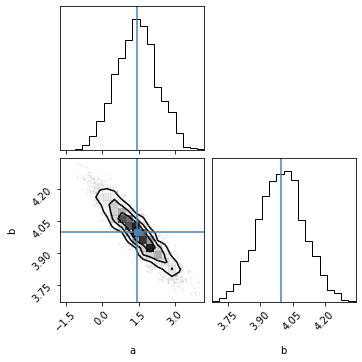

In [10]:
Ndraw=2000
a=np.zeros(Ndraw)
b=np.zeros(Ndraw)
chi2=np.zeros(Ndraw)


for i in range(Ndraw):
        yObs=np.random.normal(yTrueObs,yErrObs,size=N)
        # fit =   
        A00, A01, A11 = np.sum(yErrObs**-2), np.sum(tObs_d/(yErrObs**2)), np.sum((tObs_d/yErrObs)**2)
        A = np.array([[A00, A01],[A01, A11]])
        C = np.linalg.inv(A)
        b0, b1 = np.sum(yObs/(yErrObs**2)), np.sum((tObs_d*yObs)/(yErrObs**2))
        bb = np.array([[b0],[b1]])
        AB = np.matmul(C, bb)
        a[i]=AB[0][0]
        b[i]=AB[1][0]
        ymodel = AB[1][0]*tObs_d + AB[0][0]
        chi2Fit=np.sum(((yObs-ymodel)/yErrObs)**2)
        chi2[i]=chi2Fit

aMed=np.median(a)
aStd=np.std(a)
aMean=np.mean(a)

bMed = np.median(b)
bStd = np.std(b)
bMean = np.mean(b)

print('Analysis of parameter a:')
print('------------------------')
print('Mean: ' + str(aMean))
print('Median: ' + str(aMed))
print('Standard Deviation: ' + str(aStd))
print(' ')
print('Analysis of parameter b:')
print('------------------------')
print('Mean: ' + str(bMean))
print('Median: ' + str(bMed))
print('Standard Deviation: ' + str(bStd))

data = np.vstack((a,b))
data1 = np.transpose(data)
truth_val = np.array([aMean, bMean])
fig = corner.corner(data1, labels=['a','b'], truths = truth_val)